# *DEPRECATED* - only left for completeness sake

# Impact of Synaptic Strength on single EI population 

We want to find out what impact synaptic coupling strength has on the networks behavior.

Synchronization, strength of PING rhythm, frequency, amplitude.

We are especially interested in E -> E, and E -> I connections.

As a base model we will use a model that produces oscillations in the gamma band.
For this we need to increase the mean of the noise process until frequency jumps to ~ 30Hz.

The hardest part will be to analyze the dynamics and interplay between multiple parameters as we have 4 different connections.
This is very complex and simulations will take a lot of time. Visualization of 4 different variables is not trivial as well.


#### E -> E

#### E -> I

#### I -> I

Low Values: I cells will not fire anymore in one synchronous burst but in multiple separate bursts.
Desynchronizes firing of I cells and lowers frequency.

High Values: Always fire in one synchronous burst, tightly coupled. Inhibition of excitatory cells is increased.
External noise has less effect. Increases frequency.


#### I -> E

In [1]:
%load_ext autoreload
%autoreload 2

from synchronization import experiments
from synchronization import plots
from synchronization import constants

/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models
/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/plots_out


In [2]:
experiments.CouplingStrengthExperiment.clean()


Start cleaning models of experiment coupling
Remove file /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/coupling/0.30000000000000004.pkl
Remove file /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/coupling/0.5.pkl
Remove file /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/coupling/0.4.pkl
Remove file /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/coupling/0.2.pkl
Remove file /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/coupling/0.1.pkl
Finished cleaning.


In [3]:
experiment = experiments.CouplingStrengthExperiment()
experiment.run()


Starting simulation of 5 parameter configurations ...
1 of 5 Running parameter configuration: 0.1
initializing net ...
initialization time: 0.14980411529541016s
------------------ running network!
runtime: 6.9
2 of 5 Running parameter configuration: 0.2
initializing net ...
initialization time: 0.14924407005310059s
------------------ running network!
runtime: 6.4
3 of 5 Running parameter configuration: 0.30000000000000004
initializing net ...
initialization time: 0.12186408042907715s
------------------ running network!
runtime: 6.3
4 of 5 Running parameter configuration: 0.4
initializing net ...
initialization time: 0.12643790245056152s
------------------ running network!
runtime: 7.0
5 of 5 Running parameter configuration: 0.5
initializing net ...
initialization time: 0.17287397384643555s
------------------ running network!
runtime: 8.4
Finished simulation.


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
INFO       Overwriting environment variable "DYLD_LIBRARY_PATH" [brian2.devices.cpp_standalone.device.overwritten_env_var]


In [4]:
models = experiments.CouplingStrengthExperiment.load()
len(models)

5

Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...
Generate PSD plot ...


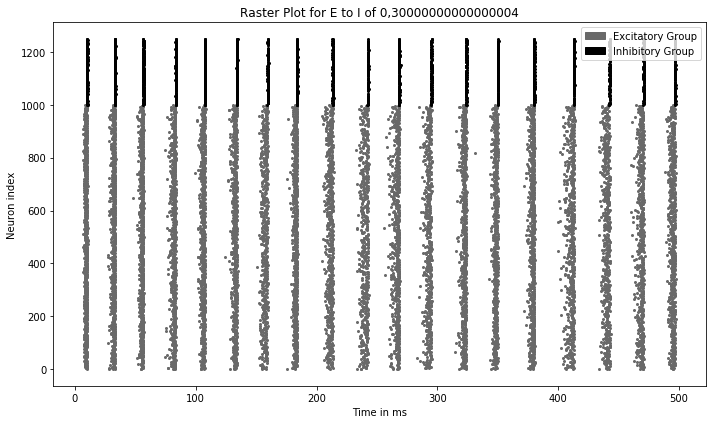

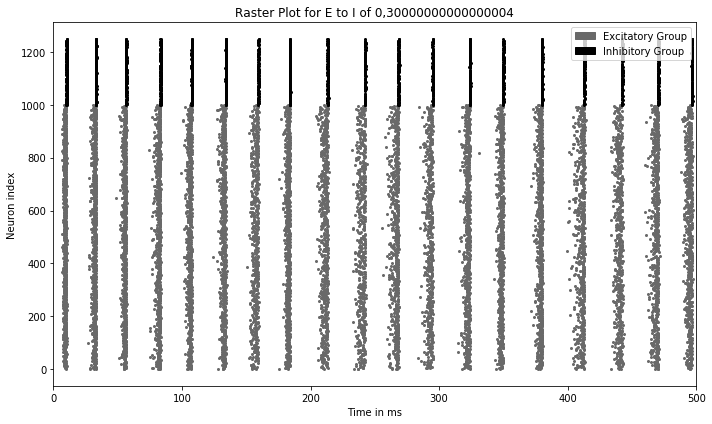

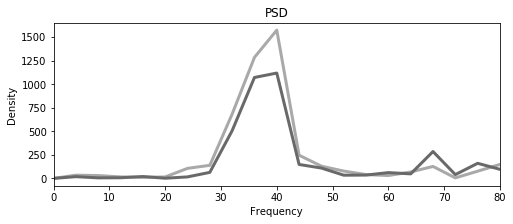

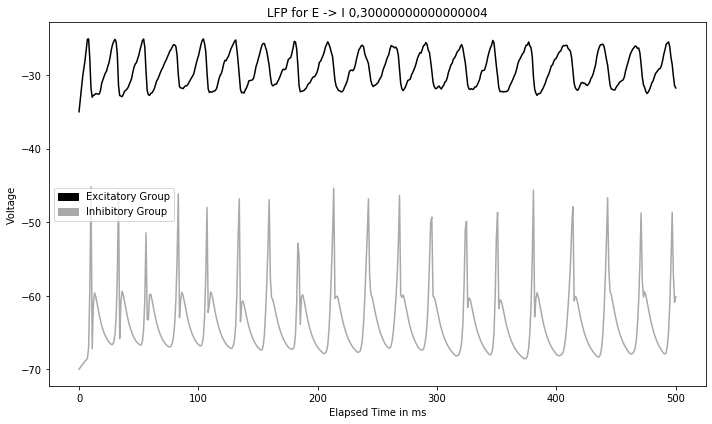

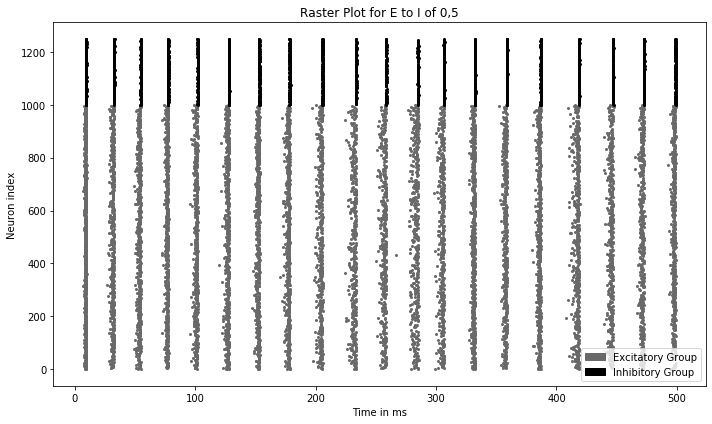

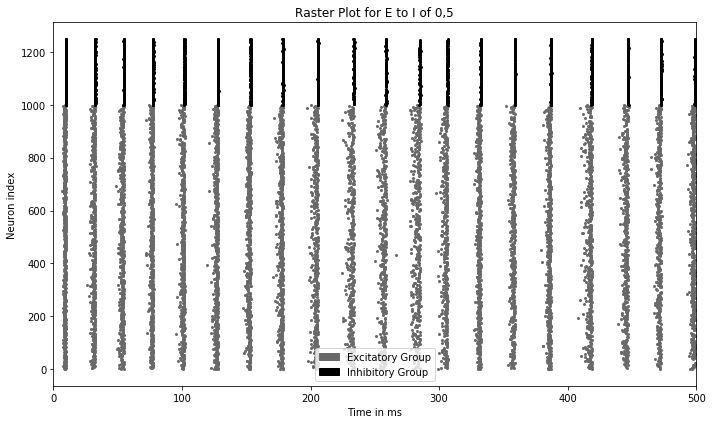

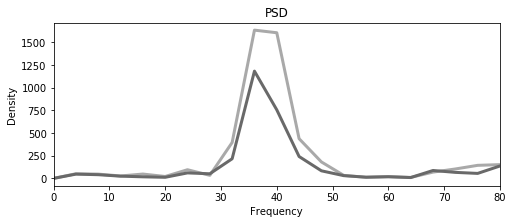

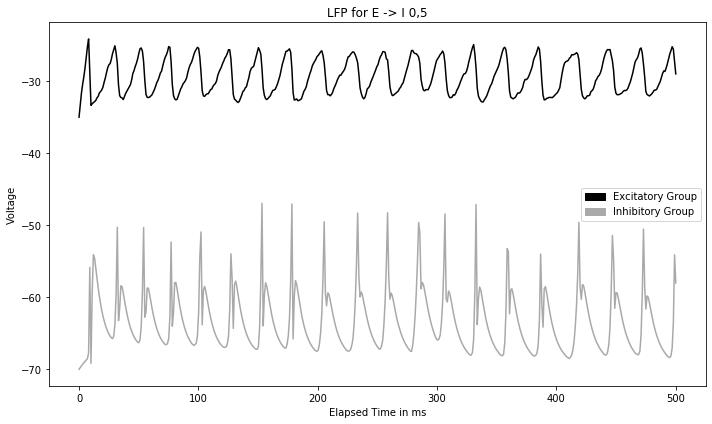

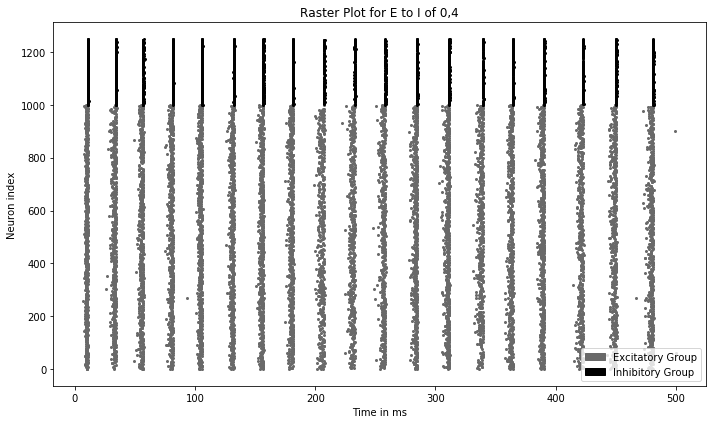

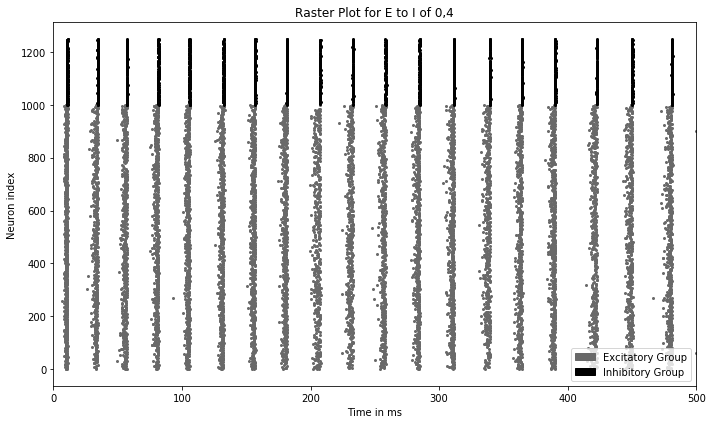

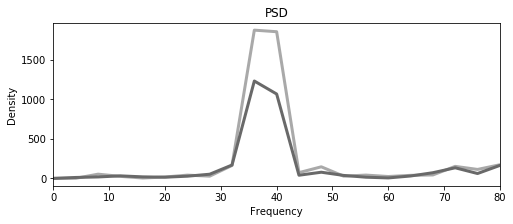

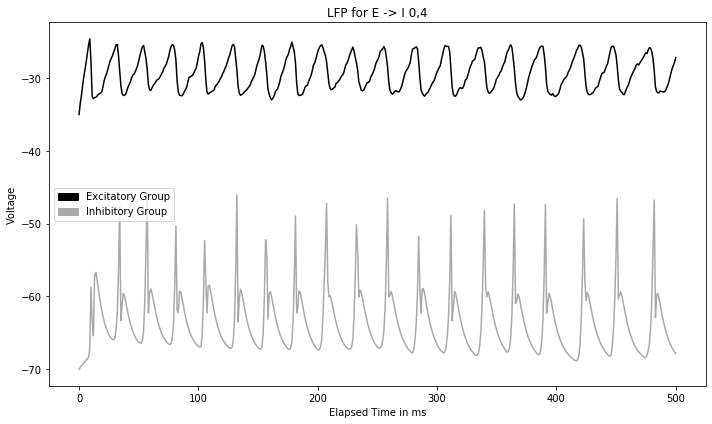

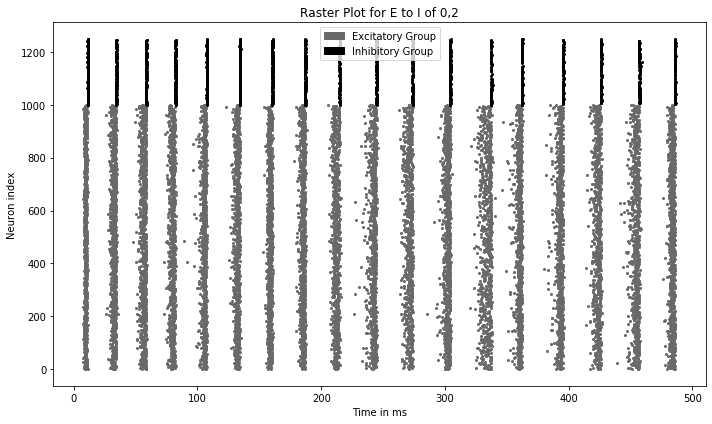

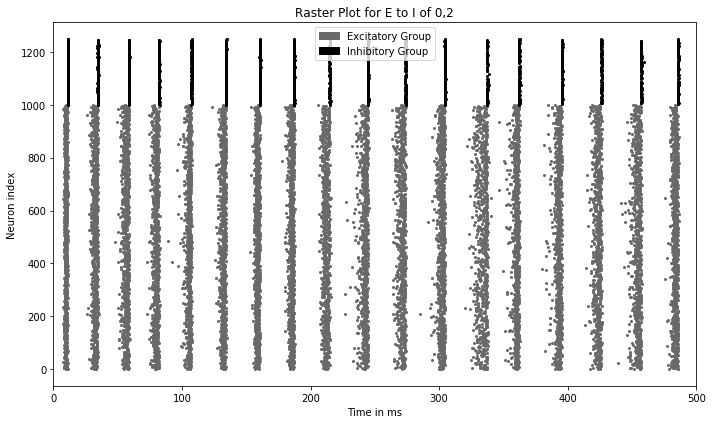

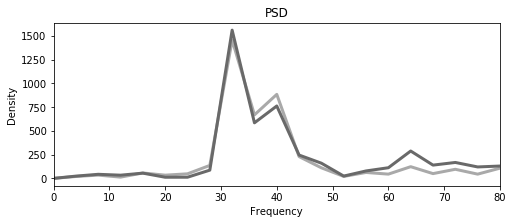

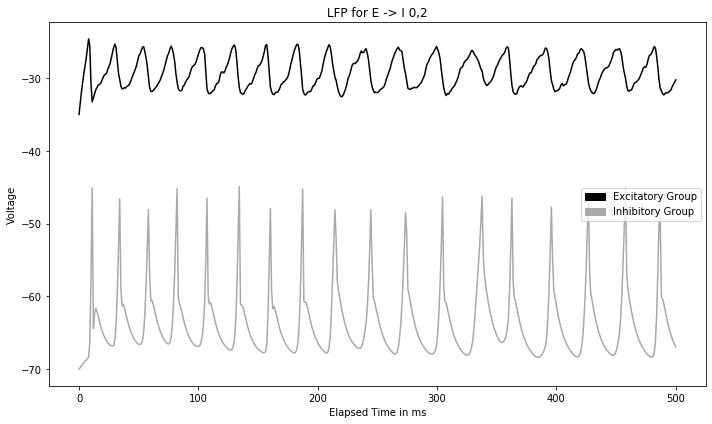

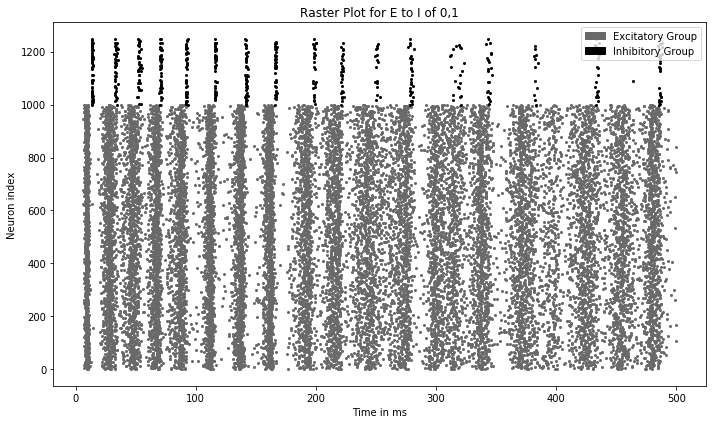

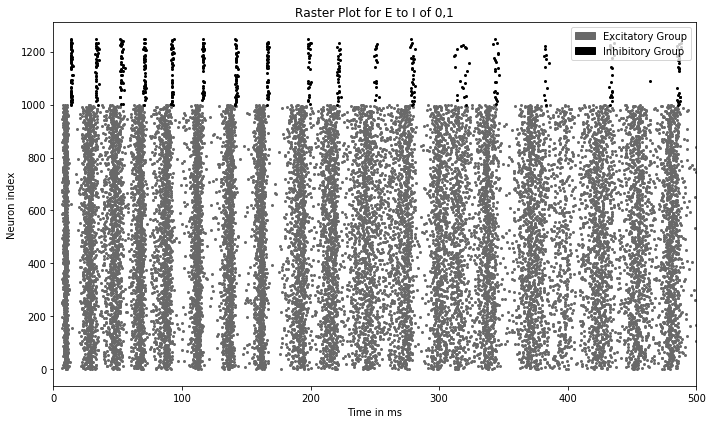

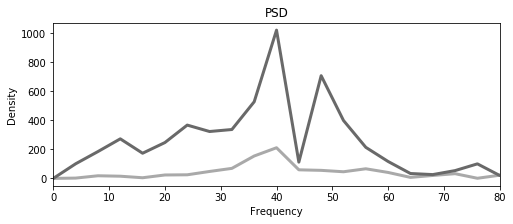

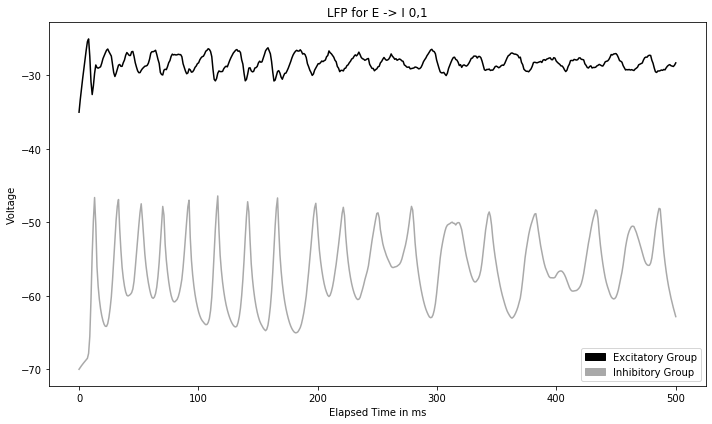

In [5]:
for model in models:    
    etoi_ = str(model["J_etoi"]).replace('.', ',')
    etoe = str(model["J_etoe"]).replace('.', ',')
    
    fig, ax = plots.raster(model, f"Raster Plot for E to I of {etoi_}")
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/raster_{etoi_}")
    
    fig, ax = plots.raster(model, f"Raster Plot for E to I of {etoi_}", x_left=0, x_right=500)
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/raster_detail_{etoi_}")
    
    fig, ax = plots.psd(title="", model=model)
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/psd_{etoi_}")
    
    fig, ax = plots.lfp(title=f"LFP for E -> I {etoi_}", model=model)
    fig.savefig(f"{constants.PLOTS_PATH}/synaptic_strength/summed_voltage_{etoi_}")


First results indicate that we can achieve spike time variability and desynchronization by changing E to I synaptic weights.

Next step should be to weaken the E -> E synapses so that they do not fire always at the same time. This should help in desynchronizing the inhibitory neurons as well.